In [66]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
#using pandas class to read job dataset and then displaying few records
dataset = pd.read_csv('Dataset/DataAnalyst.csv')
dataset

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


Text(0, 0.5, 'Number of Different Jobs %')

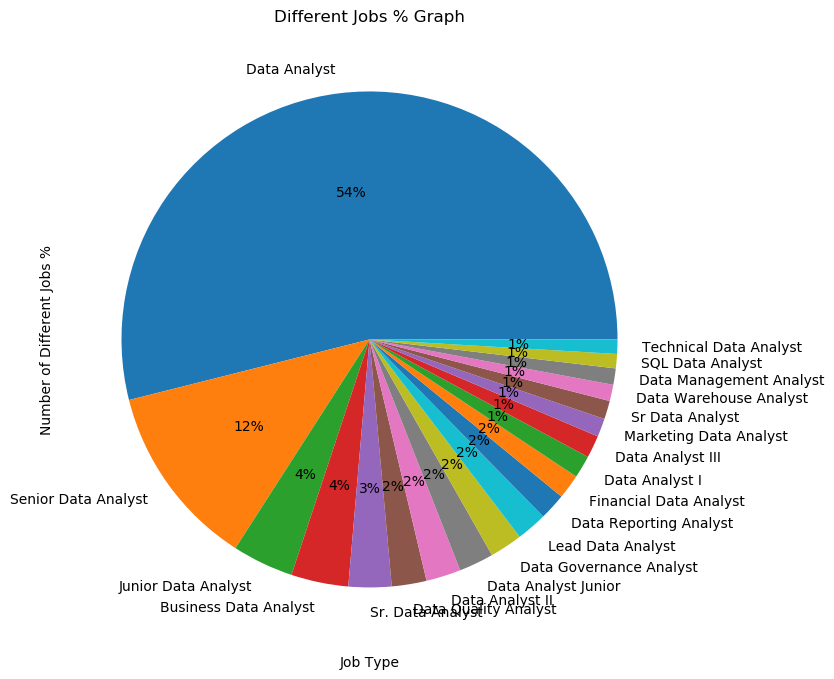

In [20]:
#finding and plotting graphs of different job titles % found in dataset
df = dataset.groupby("Job Title").size().sort_values(ascending=False).nlargest(20).reset_index()
plt.figure(figsize=(8,12))
plt.pie(df[0], labels=df['Job Title'], autopct='%.0f%%') 
plt.title("Different Jobs % Graph")
plt.xlabel("Job Type")
plt.ylabel("Number of Different Jobs %")

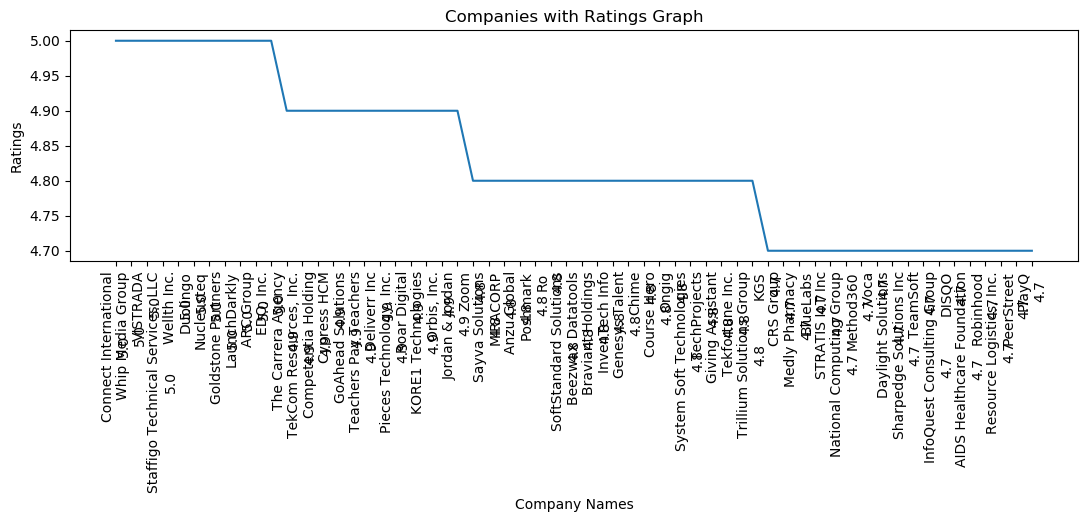

In [46]:
data = dataset.groupby(['Company Name'])['Rating'].mean().sort_values(ascending=False).nlargest(250).reset_index()
data = data.iloc[50:110]
plt.figure(figsize=(13,3))
plt.plot(data['Company Name'], data['Rating'])
plt.title("Companies with Ratings Graph")
plt.xlabel("Company Names")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
plt.show()

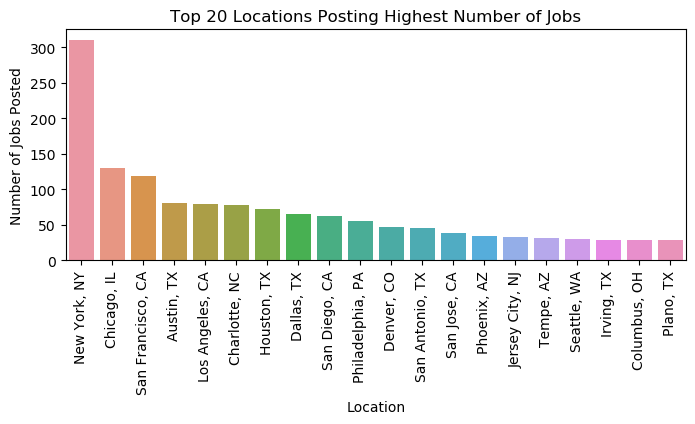

In [27]:
#dataset posted from different locations
df = dataset.groupby('Location').size().sort_values(ascending=False).nlargest(20).reset_index()
plt.figure(figsize=(8,3))
seaborn.barplot(x='Location',y=0, data=df)
plt.title('Top 20 Locations Posting Highest Number of Jobs')
plt.xlabel("Location")
plt.ylabel("Number of Jobs Posted")
plt.xticks(rotation=90)
plt.show()

In [63]:
#different job skills and description
job = dataset["Job Description"].tolist()
skills = []
#now identifying various families of Bigdata
big_data = ["big data", "hadoop", "spark", "impala", "cassandra", "kafka", "hdfs", "hbase", "hive", "mongo db", 'flume', 'sqoop',
           'flink']
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it.lower():
            counter = counter + 1
            skills.append([it])
    big_data_required[item] = counter
big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','Skills Requirement']) 
big_data_df.sort_values(['Skills Requirement'], axis=0, ascending=False, inplace=True)
big_data_df 

,Big Data Technologies,Skills Requirement
0,big data,167
1,hadoop,136
8,hive,91
2,spark,89
6,hdfs,18
5,kafka,16
3,impala,15
7,hbase,11
4,cassandra,8
11,sqoop,8


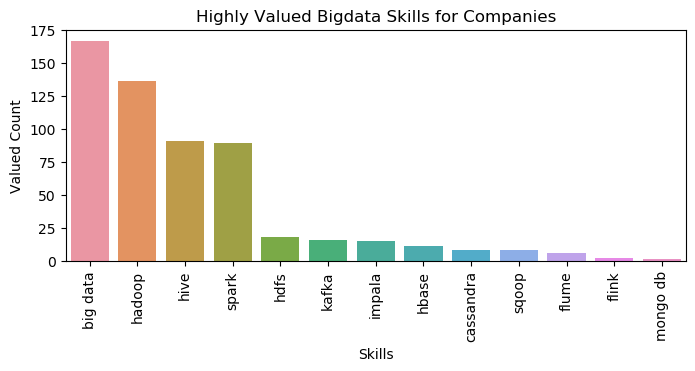

In [64]:
#graph of highly valued bigdata skills required by companies
plt.figure(figsize=(8,3))
seaborn.barplot(x='Big Data Technologies',y='Skills Requirement', data=big_data_df)
plt.title('Highly Valued Bigdata Skills for Companies')
plt.xlabel("Skills")
plt.ylabel("Valued Count")
plt.xticks(rotation=90)
plt.show()

In [73]:
#displaying description and skills for each Bigdata family
df = pd.DataFrame(skills, columns=['Descriptions & Bigdata Skills'])
pd.set_option('display.max_colwidth', None)
df

Descriptions & Bigdata Skills
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         The Data Analyst is an integral member of the global commercial data and analytics team driving commercial insights and opportunities for the world's largest English language newspaper website, DailyMail.com. This is a unique opportunity to work in a fast-paced entrepreneurial environment, with wide exposure to ad-tech and big data platforms.\n\nThe Data Analyst will be responsible for maintaining and optimizing the global commercial data systems, identifying methods to maximize commercial performance and providing business insights to internal stakeholders. This individual will have a genuine passion for digital media and data technology.\n\nDailyMail.com is a division of UK-based DMGT, an international portfolio of digital, information, media and events businesses, which employs over 12,000 people and is listed on the London Stock Exchange (LSE:DMGT.L).\n\nSpecific Responsibilities\nParticipate in cross-functional projects using advanced data modeling and analysis techniques to discover insights that will guide strategic decisions and uncover optimization opportunities.\nDevelop and maintain big data infrastructure, reporting systems and data models that support key business decisions.\nDevelop and maintain data visualization dashboards to allow data access to necessary stakeholders.\nEvaluate the configuration and performance of commercial practices against key indicators.\nContinuously monitor yield across platforms and offer innovative recommendations to internal teams to boost performance and generate new revenue.\nWork cross-functionally with teams including Operations, Sales, Marketing, Finance and Analytics to provide e

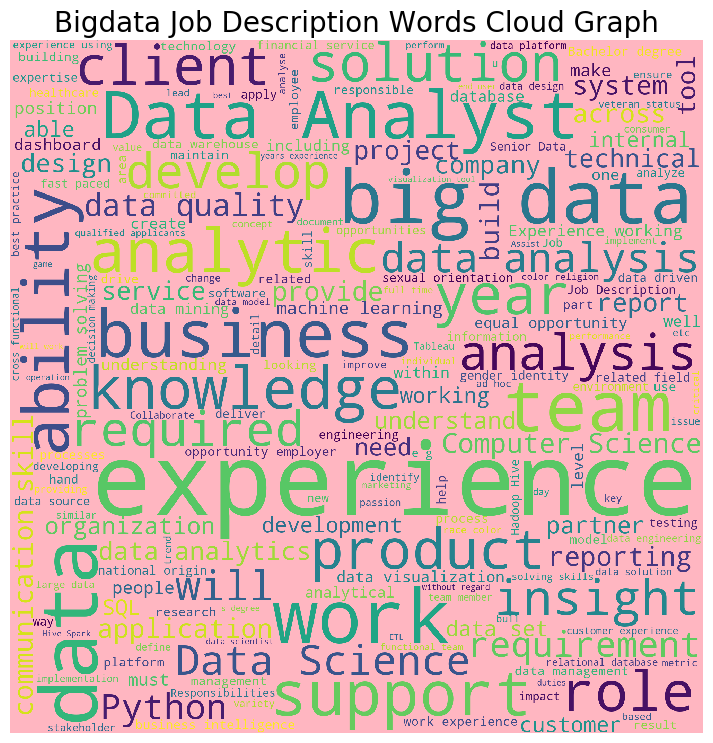

In [72]:
wordCloud = WordCloud(background_color = 'lightpink',width=2000,height= 2000).generate(' '.join(df['Descriptions & Bigdata Skills']))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title('Bigdata Job Description Words Cloud Graph',fontsize=20)
plt.imshow(wordCloud)
plt.show()